In [2]:
import numpy as np
import os
import re
import altair as alt
import pandas as pd
alt.renderers.enable('notebook')
alt.data_transformers.disable_max_rows()
import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data
import plotly.graph_objects as go

In [3]:
airlines = pd.read_csv('airlines.csv')
airports= pd.read_csv('airports.csv')
flights = pd.read_csv('Combined_ONTIME_REPORTING.csv', low_memory=False)


In [4]:
flights['DATE'] = pd.to_datetime(flights[['YEAR','MONTH','DAY']], yearfirst=True)


In [5]:
# Combining flights data sets by getting full names of airline
flights_v1 = pd.merge(flights, airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')
flights_v1.rename(columns={'AIRLINE_x': 'AIRLINE_CODE','AIRLINE_y': 'AIRLINE'}, inplace=True)

In [6]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [7]:
airport_mean_delays = pd.DataFrame(pd.Series(flights['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)
print(airport_mean_delays)
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
print(abbr_companies)
identify_airport = airports.set_index('IATA_CODE')['CITY'].to_dict()
print(identify_airport)

for carrier in abbr_companies.keys():
    fg1 = flights[flights['AIRLINE'] == carrier]
    test = fg1['DEPARTURE_DELAY'].groupby(flights['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

Empty DataFrame
Columns: []
Index: [ANC, LAX, SFO, SEA, LAS, DEN, SLC, PDX, FAI, MSP, PHX, SJU, PBG, IAG, PSE, BQN, ORD, GEG, HNL, ONT, MCO, BOS, HIB, ABR, MAF, DFW, MKE, IAH, BNA, BRO, VPS, BOI, BJI, SGF, PHL, SBN, RDD, EUG, IAD, BUF, PWM, JFK, CRP, PIA, FAT, SMF, AUS, MCI, ATL, JAX, MFR, IDA, MSN, DCA, SAT, CHS, SBA, SMX, IND, CLE, GSP, BDL, ABI, RIC, BFL, OMA, RDM, FLL, CID, TPA, SYR, ROC, TYR, LAN, XNA, GSO, EWR, PBI, RSW, OAK, PVD, RNO, PIT, ABQ, MIA, BWI, LGA, TUL, LIT, MSY, OKC, ATW, PNS, MEM, TYS, MHT, SAV, CLT, GRB, ABE, ...]

[628 rows x 0 columns]
{'UA': 'United Air Lines Inc.', 'AA': 'American Airlines Inc.', 'US': 'US Airways Inc.', 'F9': 'Frontier Airlines Inc.', 'B6': 'JetBlue Airways', 'OO': 'Skywest Airlines Inc.', 'AS': 'Alaska Airlines Inc.', 'NK': 'Spirit Air Lines', 'WN': 'Southwest Airlines Co.', 'DL': 'Delta Air Lines Inc.', 'EV': 'Atlantic Southeast Airlines', 'HA': 'Hawaiian Airlines Inc.', 'MQ': 'American Eagle Airlines Inc.', 'VX': 'Virgin America'}
{'ABE': '

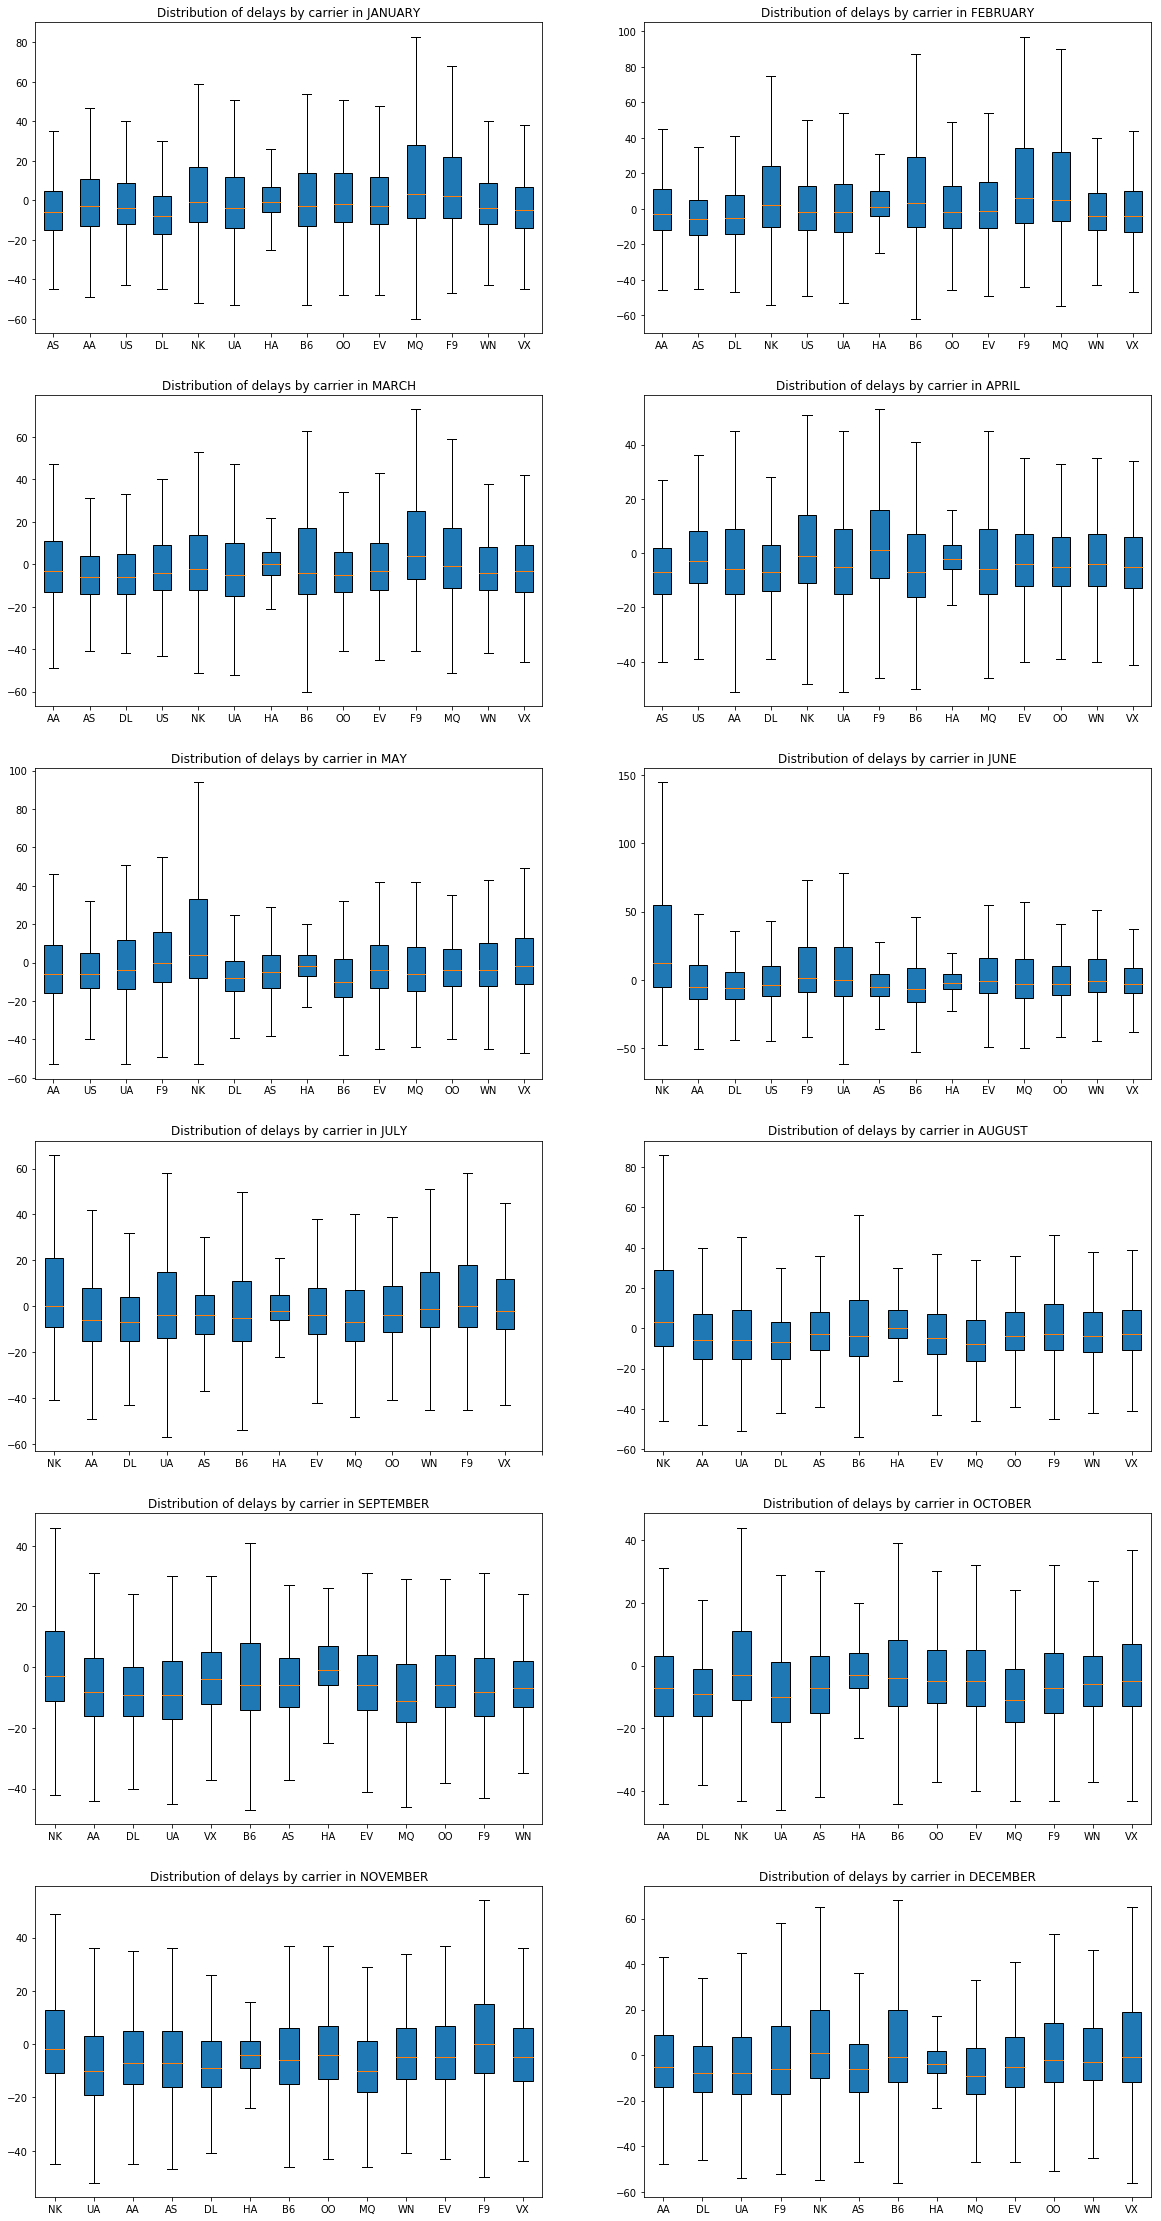

In [8]:
jan = flights[flights['MONTH']==1]
feb = flights[flights['MONTH']==2]
mar = flights[flights['MONTH']==3]
apr = flights[flights['MONTH']==4]
may = flights[flights['MONTH']==5]
jun = flights[flights['MONTH']==6]
jul = flights[flights['MONTH']==7]
aug = flights[flights['MONTH']==8]
sep = flights[flights['MONTH']==9]
oct = flights[flights['MONTH']==10]
nov = flights[flights['MONTH']==11]
dec = flights[flights['MONTH']==12]

lab = jan['AIRLINE'].unique()
l=[]
plt.figure(figsize=(20,40))
plt.subplot(6, 2, 1)
for carrier in lab:
    cl=(jan[jan['AIRLINE']==carrier]['ARRIVAL_DELAY'])
    l.append(cl.dropna().sort_values())
ax1 = plt.boxplot(l, patch_artist=True, showfliers=False) 
#print(l[0], type(d['UNIQUE_CARRIER'].unique()))
ax1 = plt.xticks(range(1, jan['AIRLINE'].nunique()+1), lab)
ax1 = plt.title('Distribution of delays by carrier in JANUARY')


lab = feb['AIRLINE'].unique()
l=[]
plt.subplot(6, 2, 2)
for carrier in lab:
    cl=(feb[feb['AIRLINE']==carrier]['ARRIVAL_DELAY'])
    l.append(cl.dropna().sort_values())
ax2 = plt.boxplot(l, patch_artist=True, showfliers=False) 
#print(l[0], type(d['UNIQUE_CARRIER'].unique()))
ax2 = plt.xticks(range(1, feb['AIRLINE'].nunique()+1), lab)
ax2 = plt.title('Distribution of delays by carrier in FEBRUARY')


l=[]
lab = mar['AIRLINE'].unique()
plt.subplot(6, 2, 3)
for carrier in lab:
    cl=(mar[mar['AIRLINE']==carrier]['ARRIVAL_DELAY'])
    l.append(cl.dropna().sort_values())
ax2 = plt.boxplot(l, patch_artist=True, showfliers=False) 
#print(l[0], type(d['UNIQUE_CARRIER'].unique()))
ax2 = plt.xticks(range(1, mar['AIRLINE'].nunique()+1), lab)
ax2 = plt.title('Distribution of delays by carrier in MARCH')


l=[]
lab = apr['AIRLINE'].unique()
plt.subplot(6, 2, 4)
for carrier in lab:
    cl=(apr[apr['AIRLINE']==carrier]['ARRIVAL_DELAY'])
    l.append(cl.dropna().sort_values())
ax2 = plt.boxplot(l, patch_artist=True, showfliers=False) 
#print(l[0], type(d['UNIQUE_CARRIER'].unique()))
ax2 = plt.xticks(range(1, apr['AIRLINE'].nunique()+1), lab)
ax2 = plt.title('Distribution of delays by carrier in APRIL')


l=[]
lab = may['AIRLINE'].unique()
plt.subplot(6, 2, 5)
for carrier in lab:
    cl=(may[may['AIRLINE']==carrier]['ARRIVAL_DELAY'])
    l.append(cl.dropna().sort_values())
ax2 = plt.boxplot(l, patch_artist=True, showfliers=False) 
#print(l[0], type(d['UNIQUE_CARRIER'].unique()))
ax2 = plt.xticks(range(1, may['AIRLINE'].nunique()+1), lab)
ax2 = plt.title('Distribution of delays by carrier in MAY')


l=[]
lab = jun['AIRLINE'].unique()
plt.subplot(6, 2, 6)
for carrier in lab:
    cl=(jun[jun['AIRLINE']==carrier]['ARRIVAL_DELAY'])
    l.append(cl.dropna().sort_values())
ax2 = plt.boxplot(l, patch_artist=True, showfliers=False) 
#print(l[0], type(d['UNIQUE_CARRIER'].unique()))
ax2 = plt.xticks(range(1, jun['AIRLINE'].nunique()+1), lab)
ax2 = plt.title('Distribution of delays by carrier in JUNE')

l=[]
lab = jul['AIRLINE'].unique()
plt.subplot(6, 2, 7)
for carrier in lab:
    cl=(jul[jul['AIRLINE']==carrier]['ARRIVAL_DELAY'])
    l.append(cl.dropna().sort_values())
ax2 = plt.boxplot(l, patch_artist=True, showfliers=False) 
#print(l[0], type(d['UNIQUE_CARRIER'].unique()))
ax2 = plt.xticks(range(1, jun['AIRLINE'].nunique()+1), lab)
ax2 = plt.title('Distribution of delays by carrier in JULY')

l=[]
lab = aug['AIRLINE'].unique()
plt.subplot(6, 2, 8)
for carrier in lab:
    cl=(aug[aug['AIRLINE']==carrier]['ARRIVAL_DELAY'])
    l.append(cl.dropna().sort_values())
ax2 = plt.boxplot(l, patch_artist=True, showfliers=False) 
#print(l[0], type(d['UNIQUE_CARRIER'].unique()))
ax2 = plt.xticks(range(1, aug['AIRLINE'].nunique()+1), lab)
ax2 = plt.title('Distribution of delays by carrier in AUGUST')

l=[]
lab = sep['AIRLINE'].unique()
plt.subplot(6, 2, 9)
for carrier in lab:
    cl=(sep[sep['AIRLINE']==carrier]['ARRIVAL_DELAY'])
    l.append(cl.dropna().sort_values())
ax2 = plt.boxplot(l, patch_artist=True, showfliers=False) 
#print(l[0], type(d['UNIQUE_CARRIER'].unique()))
ax2 = plt.xticks(range(1, sep['AIRLINE'].nunique()+1), lab)
ax2 = plt.title('Distribution of delays by carrier in SEPTEMBER')

l=[]
lab = oct['AIRLINE'].unique()
plt.subplot(6, 2, 10)
for carrier in lab:
    cl=(oct[oct['AIRLINE']==carrier]['ARRIVAL_DELAY'])
    l.append(cl.dropna().sort_values())
ax2 = plt.boxplot(l, patch_artist=True, showfliers=False) 
#print(l[0], type(d['UNIQUE_CARRIER'].unique()))
ax2 = plt.xticks(range(1, oct['AIRLINE'].nunique()+1), lab)
ax2 = plt.title('Distribution of delays by carrier in OCTOBER')

l=[]
lab = nov['AIRLINE'].unique()
plt.subplot(6, 2, 11)
for carrier in lab:
    cl=(nov[nov['AIRLINE']==carrier]['ARRIVAL_DELAY'])
    l.append(cl.dropna().sort_values())
ax2 = plt.boxplot(l, patch_artist=True, showfliers=False) 
#print(l[0], type(d['UNIQUE_CARRIER'].unique()))
ax2 = plt.xticks(range(1, nov['AIRLINE'].nunique()+1), lab)
ax2 = plt.title('Distribution of delays by carrier in NOVEMBER')

l=[]
lab = dec['AIRLINE'].unique()
plt.subplot(6, 2, 12)
for carrier in lab:
    cl=(dec[dec['AIRLINE']==carrier]['ARRIVAL_DELAY'])
    l.append(cl.dropna().sort_values())
ax2 = plt.boxplot(l, patch_artist=True, showfliers=False) 
#print(l[0], type(d['UNIQUE_CARRIER'].unique()))
ax2 = plt.xticks(range(1, dec['AIRLINE'].nunique()+1), lab)
ax2 = plt.title('Distribution of delays by carrier in DECEMBER')

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'All flights')

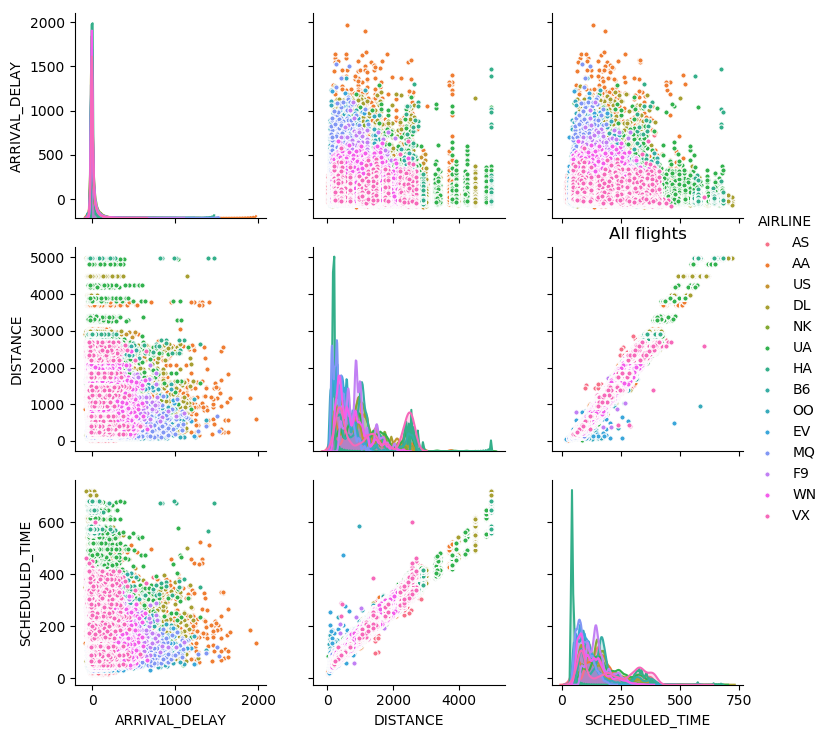

In [141]:
plt.style.use('default')
sns.pairplot(flights.loc[:,['ARRIVAL_DELAY', 'DISTANCE', 'SCHEDULED_TIME', 'AIRLINE']], hue='AIRLINE', plot_kws={'s':14})
plt.title('All flights')

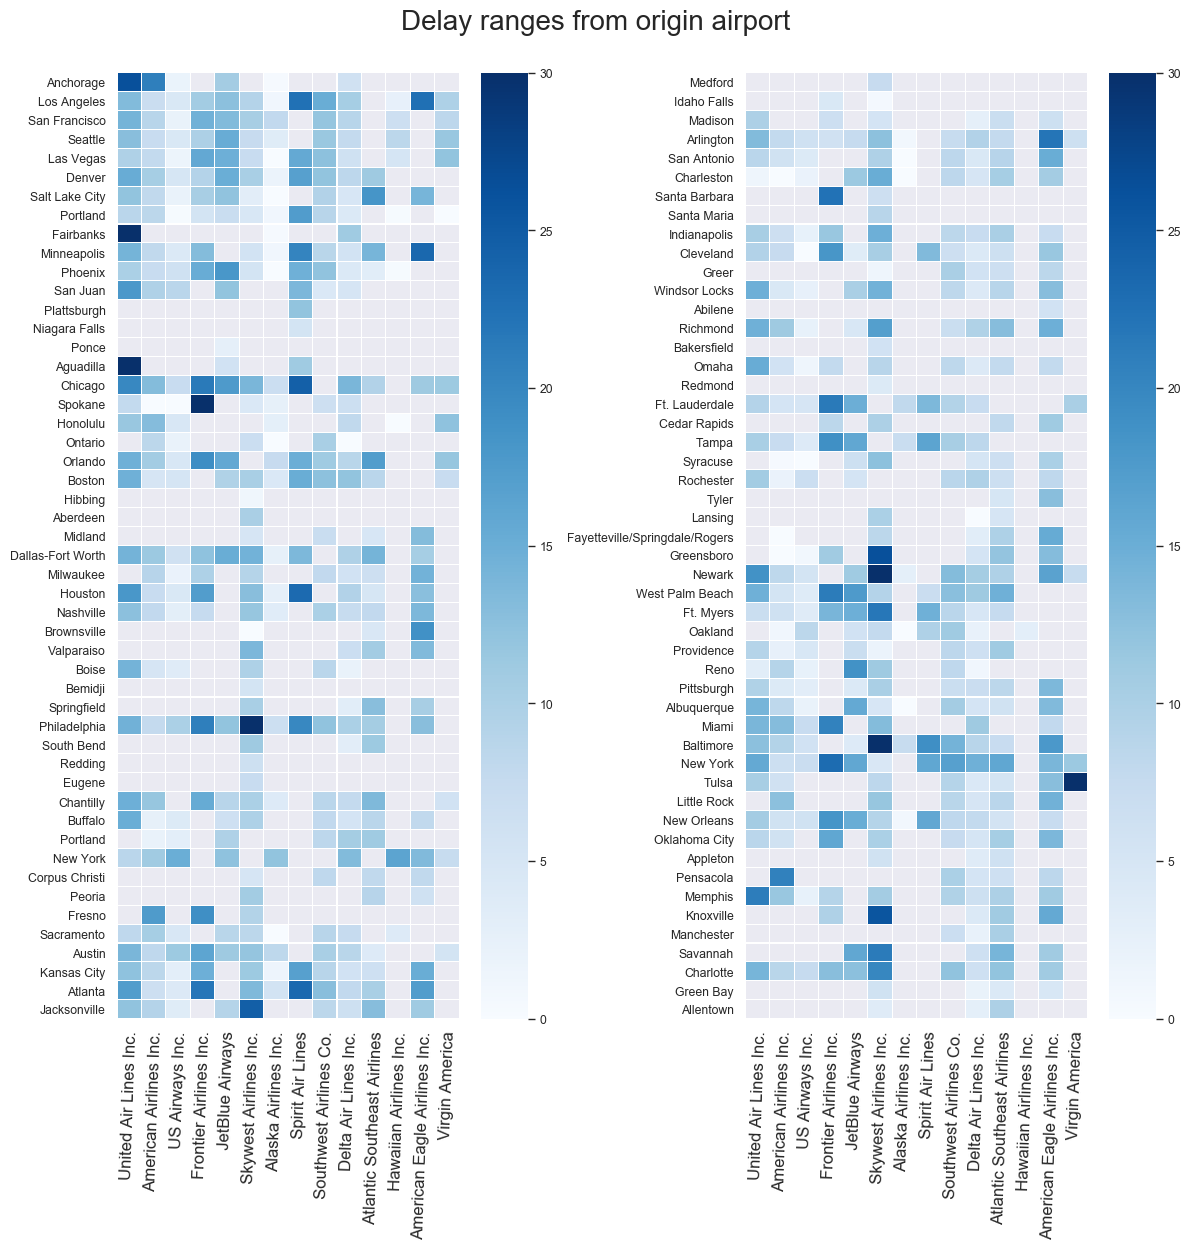

In [142]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(12,12))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.05, cmap="Blues", mask=mask, vmin = 0, vmax = 30)
plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Delay ranges from origin airport", ha='center', fontsize = 20)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.05, cmap="Blues", mask=mask, vmin = 0, vmax = 30)
plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()

# different sequencial color maps
#            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

This above visualization can be used to identify the delay range for any particular airline for any particular airport.

In [9]:
airline_rank_v01 = pd.DataFrame({'flight_volume' : flights_v1.groupby(['AIRLINE'])['FLIGHT_NUMBER'].count()}).reset_index()
airline_rank_v01.sort_values("flight_volume", ascending=True, inplace=True)
flight_volume_total = airline_rank_v01['flight_volume'].sum()
airline_rank_v01['flight_pcnt'] = airline_rank_v01['flight_volume']/flight_volume_total

In [10]:
airline_rank_v02 = pd.DataFrame({'cancellation_rate' : flights_v1.groupby(['AIRLINE'])['CANCELLED'].mean()}).reset_index()
airline_rank_v02.sort_values("cancellation_rate", ascending=False, inplace=True)
airline_rank_v03 = pd.DataFrame({'diversion_rate' : flights_v1.groupby(['AIRLINE'])['DIVERTED'].mean()}).reset_index()
airline_rank_v03.sort_values("diversion_rate", ascending=False, inplace=True)
airline_rank_v1 = pd.merge(airline_rank_v01, airline_rank_v02, left_on='AIRLINE', right_on='AIRLINE', how='left')
airline_rank_v1 = pd.merge(airline_rank_v1, airline_rank_v03, left_on='AIRLINE', right_on='AIRLINE', how='left')

In [11]:
airline_rank_v04 = pd.DataFrame({'taxi_out_time' : flights_v1.groupby(['AIRLINE'])['TAXI_OUT'].mean()}).reset_index()
airline_rank_v05 = pd.DataFrame({'taxi_in_time' : flights_v1.groupby(['AIRLINE'])['TAXI_IN'].mean()}).reset_index()

In [12]:
airline_rank_v1

,AIRLINE,flight_volume,flight_pcnt,cancellation_rate,diversion_rate
0,Virgin America,61903,0.010638,0.008626,0.001955
1,Hawaiian Airlines Inc.,76272,0.013107,0.002242,0.000787
2,Frontier Airlines Inc.,90836,0.015610,0.006473,0.001739
3,Spirit Air Lines,117379,0.020171,0.017073,0.001551
4,Alaska Airlines Inc.,172521,0.029647,0.003878,0.002394
5,US Airways Inc.,198715,0.034149,0.020466,0.002139
6,JetBlue Airways,267048,0.045892,0.016012,0.002734
7,American Eagle Airlines Inc.,294632,0.050632,0.050996,0.002770
8,United Air Lines Inc.,515723,0.088626,0.012745,0.002691
9,Atlantic Southeast Airlines,571977,0.098293,0.026629,0.003486


[Text(0.5, 0, 'taxi_time (taxi_in: black, taxi_out: magenta) in minutes')]

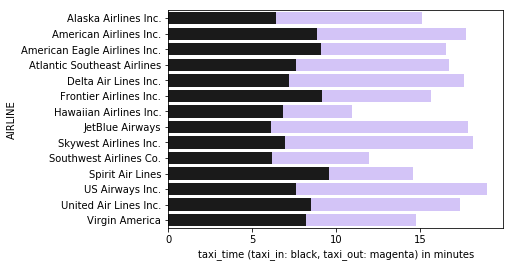

In [16]:
ax = plt.subplots()
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
ax = sns.barplot(x="taxi_out_time", y="AIRLINE", data=airline_rank_v04, color="m")
ax = sns.barplot(x="taxi_in_time", y="AIRLINE", data=airline_rank_v05, color="k")
ax.set(xlabel="taxi_time (taxi_in: black, taxi_out: magenta) in minutes")



In [14]:
airline_rank_v07 = pd.DataFrame({'avg_arrival_delay' : flights_v1.groupby(['AIRLINE'])['ARRIVAL_DELAY'].mean()}).reset_index()
airline_rank_v08 = pd.DataFrame({'avg_departure_delay' : flights_v1.groupby(['AIRLINE'])['DEPARTURE_DELAY'].mean()}).reset_index()

airline_rank_v1 = pd.merge(airline_rank_v1, airline_rank_v07, left_on='AIRLINE', right_on='AIRLINE', how='left')
airline_rank_v1 = pd.merge(airline_rank_v1, airline_rank_v08, left_on='AIRLINE', right_on='AIRLINE', how='left')

[Text(0.5, 0, 'delay_time (arrival: black, departure: magenta)')]

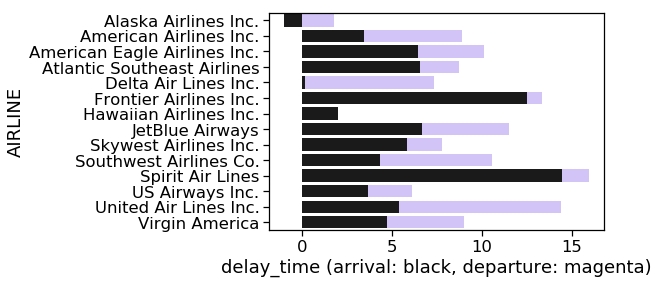

In [15]:
ax = sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
ax = sns.barplot(x="avg_departure_delay", y="AIRLINE", data=airline_rank_v08, label="accuracy", color="m")
ax = sns.barplot(x="avg_arrival_delay", y="AIRLINE", data=airline_rank_v07, label="accuracy", color="k")
ax.set(xlabel="delay_time (arrival: black, departure: magenta)")

Except Hawaiian Airlines, all other airlines have longer departure delays than arrival delays.
This is partly because most of the airlines catchup arrival delay during airtime by increasing the speed.

Frontier & Spirit Airlines are the top two airlines with longest arrival and departure delays.

To my surprise Alaskan airlines is the only airline with arrival time at the destination earlier than the scehduled time.


In [51]:
day_of_week_desc={
    7:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}
flights['Day of week']=flights['DAY_OF_WEEK'].apply(lambda a:day_of_week_desc[a])
flights.head()['Day of week']

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: Day of week, dtype: object

Text(0.5, 1.0, 'Cancellations')

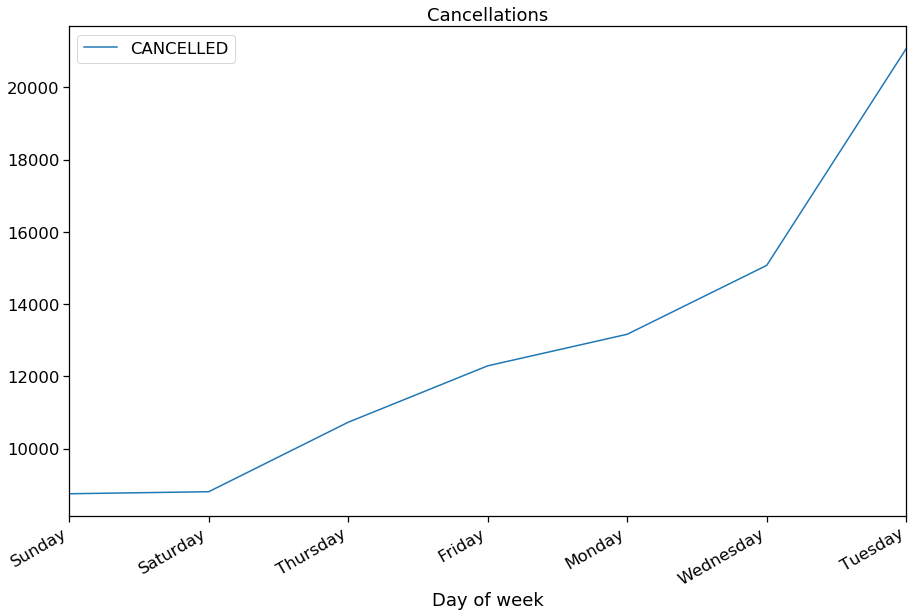

In [52]:
df_cancellations = pd.DataFrame(flights.groupby('Day of week').sum()['CANCELLED'])
df_cancellations=df_cancellations.sort_values(['CANCELLED'],ascending =1)
df_cancellations.head()
df_cancellations.plot(kind='line',figsize=(15,10),subplots=True,legend=True)
plt.title('Cancellations')

As this line chart show, during entire year, Tuesdays has seen the highest number of flight cancellations.

In [16]:
print(flights_v1.columns)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_CODE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DATE', 'IATA_CODE', 'AIRLINE'],
      dtype='object')


In [17]:
print(airports.columns)

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')


In [18]:
flights_v1 = pd.merge(flights_v1, airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left')

In [19]:
print(flights_v1.columns)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_CODE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DATE', 'IATA_CODE_x',
       'AIRLINE', 'IATA_CODE_y', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')


In [20]:
flights_v1.rename(columns={'IATA_CODE_x': 'IATA_CODE'}, inplace=True)
flights_v1.drop('IATA_CODE_y', axis=1, inplace=True)

In [21]:
print(flights_v1.columns)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_CODE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DATE', 'IATA_CODE', 'AIRLINE',
       'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE'],
      dtype='object')


In [22]:
cancelled_flights = flights_v1[flights_v1['CANCELLED'] == 1]
diverted_flights = flights_v1[flights_v1['DIVERTED'] == 1]
delayed_flights = flights_v1[flights_v1['ARRIVAL_DELAY'] > 0]

In [23]:
print(cancelled_flights.shape)
print(diverted_flights.shape)
print(delayed_flights.shape)

(89884, 40)
(15187, 40)
(2086896, 40)


In [24]:
cancelled_grouped_by_state = cancelled_flights.groupby('STATE').size()

In [25]:
diverted_grouped_by_state = diverted_flights.groupby('STATE').size()

In [26]:
delayed_grouped_by_state = delayed_flights.groupby('STATE').size()

In [27]:
print(cancelled_grouped_by_state.head())

STATE
AK     395
AL     431
AR     681
AZ    1129
CA    8074
dtype: int64


In [28]:
print(diverted_grouped_by_state.head())

STATE
AK    151
AL     91
AR     50
AS      1
AZ    402
dtype: int64


In [29]:
print(delayed_grouped_by_state.head())

STATE
AK    11533
AL     9455
AR     8366
AS       67
AZ    64448
dtype: int64


In [30]:
states = alt.topo_feature(data.us_10m.url, 'states')
states

UrlData({
  format: TopoDataFormat({
    feature: 'states',
    type: 'topojson'
  }),
  url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
})

In [31]:
cancelled_grouped_by_state = cancelled_grouped_by_state.to_frame()
cancelled_grouped_by_state = pd.melt(cancelled_grouped_by_state)

In [32]:
diverted_grouped_by_state = diverted_grouped_by_state.to_frame()
diverted_grouped_by_state = pd.melt(diverted_grouped_by_state)

In [33]:
delayed_grouped_by_state = delayed_grouped_by_state.to_frame()
delayed_grouped_by_state = pd.melt(delayed_grouped_by_state)

In [34]:
cancelled_grouped_by_state[0]=('AK','AL','AR','AZ','CA','CO','CT','DE','FL','GA','GU','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','PR','RI','SC','SD','TN','TX','UT','VA','VI','VT','WA','WI','WV','WY')
cancelled_grouped_by_state = cancelled_grouped_by_state.drop(columns=['variable'])
cancelled_grouped_by_state.columns = ['count','STATE']
print(cancelled_grouped_by_state.head())


   count STATE
0    395    AK
1    431    AL
2    681    AR
3   1129    AZ
4   8074    CA


In [35]:

diverted_grouped_by_state[0]=('AK','AL','AR','AS','AZ','CA','CO','CT','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','PR','RI','SC','SD','TN','TX','UT','VA','VI','VT','WA','WI','WV','WY')
diverted_grouped_by_state = diverted_grouped_by_state.drop(columns=['variable'])
diverted_grouped_by_state.columns = ['count','STATE']
print(diverted_grouped_by_state.head())

   count STATE
0    151    AK
1     91    AL
2     50    AR
3      1    AS
4    402    AZ


In [36]:
delayed_grouped_by_state[0]=('AK','AL','AR','AS','AZ','CA','CO','CT','DE','FL','GA','GU','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','PR','RI','SC','SD','TN','TX','UT','VA','VI','VT','WA','WI','WV','WY')
delayed_grouped_by_state = delayed_grouped_by_state.drop(columns=['variable'])
delayed_grouped_by_state.columns = ['count','STATE']
print(delayed_grouped_by_state.head())

   count STATE
0  11533    AK
1   9455    AL
2   8366    AR
3     67    AS
4  64448    AZ


In [37]:
fig = go.Figure(data=go.Choropleth(
    locations=cancelled_grouped_by_state['STATE'], # Spatial coordinates
    z = cancelled_grouped_by_state['count'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "No of Flights",
))

fig.update_layout(
    title_text = 'Cancelled Flights',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [128]:
fig = go.Figure(data=go.Choropleth(
    locations=diverted_grouped_by_state['STATE'], # Spatial coordinates
    z = diverted_grouped_by_state['count'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "No of Flights",
))

fig.update_layout(
    title_text = 'Diverted Flights',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [129]:
fig = go.Figure(data=go.Choropleth(
    locations=delayed_grouped_by_state['STATE'], # Spatial coordinates
    z = delayed_grouped_by_state['count'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "No of Flights",
))

fig.update_layout(
    title_text = 'Delayed Flights',
    geo_scope='usa', # limite map scope to USA
)

fig.show()